# **1. Importing Libraries**

In [2]:
#Importing the libraries
!pip install tf-keras
!pip install vaderSentiment
!pip install transformers
!pip install torch
!pip install wordcloud
!pip3 install torch torchvision

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import warnings

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


# **2. Data Processing**

In [7]:
# Loading  the dataset
dallas_data = pd.read_csv('/content/Dallas_Airbnb (1).csv', low_memory=False)
dallas_data.head()


listing_id                  id        date  reviewer_id reviewer_name  \
0    53780147  736993546555370861  10/13/2022    349931594       Cynthia   
1    53780147  742817444594172048  10/21/2022     65077143        Ariana   
2    53780147  744189228773388881  10/23/2022    464923665       Melissa   
3    53780147  745709706504143766  10/25/2022    481406224        Gadiel   
4    53780147  746397246342559430  10/26/2022    166360068       Richard   

                                            comments      id-1  \
0  Cute modern stay. Love the little touches thro...  53780147   
1  Very clean, well decorated and spacious Airbnb...  53780147   
2  Great place to stay for our group of 5.  Clean...  53780147   
3  Lovely place, clean spaces, it has everything ...  53780147   
4  The rooftop lounging space was perfect. The ho...  53780147   

                             listing_url       scrape_id last_scraped  ...  \
0  https://www.airbnb.com/rooms/53780147  20240619201441    6/20/2024  ...   
1  https://www.airbnb.com/rooms/53780147  20240619201441    6/20/2024  ...   
2  https://www.airbnb.com/rooms/53780147  20240619201441    6/20/2024  ...   
3  https://www.airbnb.com/rooms/53780147  20240619201441    6/20/2024  ...   
4  https://www.airbnb.com/rooms/53780147  20240619201441    6/20/2024  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.97                   4.57                4.89   
1                        4.97                   4.57                4.89   
2                        4.97                   4.57                4.89   
3                        4.97                   4.57                4.89   
4                        4.97                   4.57                4.89   

  license instant_bookable  calculated_host_listings_count  \
0     NaN            False                             1.0   
1     NaN            False                             1.0   
2     NaN            False                             1.0   
3     NaN            False                             1.0   
4     NaN            False                             1.0   

  calculated_host_listings_count_entire_homes  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   

  calculated_host_listings_count_private_rooms  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              4.68  
1                                         0.0              4.68  
2                                         0.0              4.68  
3                                         0.0              4.68  
4                                         0.0              4.68  

[5 rows x 81 columns]

# **Descriptive Statistics**

In [8]:
dallas_data.describe()

listing_id            id   reviewer_id          id-1     scrape_id  \
count  1.751900e+04  1.751900e+04  1.751900e+04  1.751900e+04  1.751900e+04   
mean   6.195790e+17  9.212731e+17  2.604166e+08  6.195790e+17  2.024062e+13   
std    3.162350e+17  1.974045e+17  1.716260e+08  3.162350e+17  5.015768e+00   
min    6.187800e+04  1.600580e+05  1.307500e+04  6.187800e+04  2.024062e+13   
25%    5.740781e+17  8.145259e+17  1.018413e+08  5.740781e+17  2.024062e+13   
50%    7.159658e+17  9.544047e+17  2.453104e+08  7.159658e+17  2.024062e+13   
75%    8.291738e+17  1.067508e+18  4.157025e+08  8.291738e+17  2.024062e+13   
max    1.026295e+18  1.182765e+18  5.813148e+08  1.026295e+18  2.024062e+13   

            host_id  host_acceptance_rate  host_listings_count  \
count  1.751900e+04          17055.000000         17518.000000   
mean   2.654878e+08              0.964739            21.531168   
std    1.770336e+08              0.085413           125.777514   
min    1.823250e+05              0.000000             1.000000   
25%    8.112568e+07              0.970000             2.000000   
50%    2.522203e+08              0.990000             5.000000   
75%    4.338454e+08              1.000000            16.000000   
max    5.743567e+08              1.000000          2877.000000   

       host_total_listings_count  neighbourhood_group_cleansed  ...  \
count               17518.000000                           0.0  ...   
mean                   34.452449                           NaN  ...   
std                   209.457397                           NaN  ...   
min                     1.000000                           NaN  ...   
25%                     2.000000                           NaN  ...   
50%                     6.000000                           NaN  ...   
75%                    24.000000                           NaN  ...   
max                  7928.000000                           NaN  ...   

       review_scores_checkin  review_scores_communication  \
count           17518.000000                 17518.000000   
mean                4.866584                     4.901940   
std                 0.161810                     0.138753   
min                 1.000000                     1.000000   
25%                 4.830000                     4.880000   
50%                 4.910000                     4.940000   
75%                 4.960000                     4.980000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  license  \
count            17517.000000         17518.000000      0.0   
mean                 4.724237             4.777064      NaN   
std                  0.246072             0.179832      NaN   
min                  1.000000             1.000000      NaN   
25%                  4.620000             4.720000      NaN   
50%                  4.790000             4.810000      NaN   
75%                  4.910000             4.890000      NaN   
max                  5.000000             5.000000      NaN   

       calculated_host_listings_count  \
count                    17518.000000   
mean                         9.312307   
std                         13.677865   
min                          1.000000   
25%                          1.000000   
50%                          3.000000   
75%                         10.000000   
max                        122.000000   

       calculated_host_listings_count_entire_homes  \
count                                 17518.000000   
mean                                      9.028028   
std                                      13.645403   
min                                       0.000000   
25%                                       1.000000   
50%                                       3.000000   
75%                                       8.000000   
max                                     122.000000   

       calculated_host_listings_count_private_rooms  \
count                           

In [9]:
dallas_data['price'].describe()

count    17202.000000
mean       202.481398
std        425.024507
min         20.000000
25%        101.000000
50%        149.000000
75%        224.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
print(dallas_data['date'].dtype)

object


# Data Type Conversion for 'date' Column

In [11]:
# Convert the 'date' or 'last_scraped' column to datetime
dallas_data['date'] = pd.to_datetime(dallas_data['date'], errors='coerce')


In [12]:
dallas_data.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'id-1', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximu

In [13]:
# Dropping irrelevant columns
dallas_data.drop([
    'listing_id', 'id-1',
    'listing_url', 'scrape_id', 'source', 'name', 'description', 'neighborhood_overview',
    'picture_url', 'host_id', 'host_url', 'host_since', 'host_location', 'host_about',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url',
    'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_updated',
    'calendar_last_scraped', 'first_review', 'license', 'host_has_profile_pic',
    'host_identity_verified', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'neighbourhood_group_cleansed'
], axis=1, inplace=True, errors='ignore')

In [14]:
missing_values_summary_before = dallas_data.isnull().sum()
print("\nMissing Values After Handling:\n", missing_values_summary_before[missing_values_summary_before > 0])


Missing Values After Handling:
 comments                          7
host_is_superhost              1322
host_listings_count               1
host_total_listings_count         1
neighbourhood                  5697
neighbourhood_cleansed            1
latitude                          1
longitude                         1
property_type                     1
room_type                         1
accommodates                      1
bathrooms                       310
bathrooms_text                    3
bedrooms                          3
beds                            310
amenities                         1
price                           317
minimum_nights                    1
maximum_nights                    1
minimum_minimum_nights            1
maximum_minimum_nights            1
minimum_maximum_nights            1
maximum_maximum_nights            1
minimum_nights_avg_ntm            1
maximum_nights_avg_ntm            1
has_availability                  1
availability_30                

In [15]:
# Handling missing values for numerical columns
numerical_cols = dallas_data.select_dtypes(include=['float64', 'int64']).columns
for colm in numerical_cols:
    if dallas_data[colm].isnull().sum() > 0:
        # Filling with mean (or median depending on context)
        dallas_data[colm] = dallas_data[colm].fillna(dallas_data[colm].mean())

In [16]:
# Handling missing values for categorical columns
categorical_cols = dallas_data.select_dtypes(include=['object']).columns

for colm in categorical_cols:
    if dallas_data[colm].isnull().sum() > 0:
        # Filling with the most frequent value (mode)
        dallas_data[colm] = dallas_data[colm].fillna(dallas_data[colm].mode()[0])
        # Infer object types after filling
        dallas_data[colm] = dallas_data[colm].infer_objects()


<ipython-input-16-3329aff9f28d>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dallas_data[colm] = dallas_data[colm].fillna(dallas_data[colm].mode()[0])


In [17]:
# After handling missing values
missing_values_summary_after = dallas_data.isnull().sum()
print("\nMissing Values After Handling:\n", missing_values_summary_after[missing_values_summary_after > 0])



Missing Values After Handling:
 Series([], dtype: int64)


In [18]:
dallas_data.columns

Index(['id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'last_scraped', 'host_name', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_sco

In [19]:
# Step 4: Data Preprocessing
# Select relevant features for the model
data_cleaned = dallas_data[['price', 'availability_365', 'reviews_per_month', 'number_of_reviews',
                              'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin',
                              'host_is_superhost', 'room_type', 'property_type', 'bedrooms', 'bathrooms', 'accommodates']]
data_cleaned.head()

price  availability_365  reviews_per_month  number_of_reviews  \
0  198.0             172.0               4.68              142.0   
1  198.0             172.0               4.68              142.0   
2  198.0             172.0               4.68              142.0   
3  198.0             172.0               4.68              142.0   
4  198.0             172.0               4.68              142.0   

   review_scores_rating  review_scores_cleanliness  review_scores_checkin  \
0                  4.91                       4.93                   4.94   
1                  4.91                       4.93                   4.94   
2                  4.91                       4.93                   4.94   
3                  4.91                       4.93                   4.94   
4                  4.91                       4.93                   4.94   

   host_is_superhost        room_type property_type  bedrooms  bathrooms  \
0               True  Entire home/apt   Entire home       3.0        3.0   
1               True  Entire home/apt   Entire home       3.0        3.0   
2               True  Entire home/apt   Entire home       3.0        3.0   
3               True  Entire home/apt   Entire home       3.0        3.0   
4               True  Entire home/apt   Entire home       3.0        3.0   

   accommodates  
0          10.0  
1          10.0  
2          10.0  
3          10.0  
4          10.0

# Changing categorical to numerical

In [20]:
#checking the value count
data_cleaned['host_is_superhost'].value_counts()

host_is_superhost
True     12570
False     4949
Name: count, dtype: int64

In [21]:
data_cleaned['host_is_superhost'].dtype

dtype('bool')

In [22]:
data_cleaned.loc[:, 'host_is_superhost'] = data_cleaned['host_is_superhost'].astype(int)

<ipython-input-22-13febfcfe8ef>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[:, 'host_is_superhost'] = data_cleaned['host_is_superhost'].astype(int)


In [23]:
data_cleaned['room_type'].value_counts()

room_type
Entire home/apt    16748
Private room         709
Shared room           55
Hotel room             7
Name: count, dtype: int64

In [24]:
room_type_map={"Entire home/apt":0,"Private room":1,"Shared room":2,"Hotel room":3}

In [25]:
data_cleaned.loc[:, 'room_type'] = data_cleaned['room_type'].map(lambda x:room_type_map[x])

In [26]:
property_type_map={idx:i for i,idx in enumerate(data_cleaned['property_type'].unique())}

In [27]:
property_type_map

{'Entire home': 0,
 'Entire rental unit': 1,
 'Private room in home': 2,
 'Entire condo': 3,
 'Tiny home': 4,
 'Entire townhouse': 5,
 'Private room in rental unit': 6,
 'Entire guesthouse': 7,
 'Entire cottage': 8,
 'Entire serviced apartment': 9,
 'Private room in bungalow': 10,
 'Entire guest suite': 11,
 'Entire villa': 12,
 'Entire loft': 13,
 'Private room in casa particular': 14,
 'Private room in townhouse': 15,
 'Room in hotel': 16,
 'Shared room in home': 17,
 'Treehouse': 18,
 'Entire vacation home': 19,
 'Entire bungalow': 20,
 'Private room in condo': 21,
 'Shared room in rental unit': 22,
 'Farm stay': 23}

In [28]:
data_cleaned.loc[:, 'property_type'] = data_cleaned['property_type'].map(lambda x:property_type_map[x])

In [29]:
data_cleaned.head()

price  availability_365  reviews_per_month  number_of_reviews  \
0  198.0             172.0               4.68              142.0   
1  198.0             172.0               4.68              142.0   
2  198.0             172.0               4.68              142.0   
3  198.0             172.0               4.68              142.0   
4  198.0             172.0               4.68              142.0   

   review_scores_rating  review_scores_cleanliness  review_scores_checkin  \
0                  4.91                       4.93                   4.94   
1                  4.91                       4.93                   4.94   
2                  4.91                       4.93                   4.94   
3                  4.91                       4.93                   4.94   
4                  4.91                       4.93                   4.94   

   host_is_superhost room_type property_type  bedrooms  bathrooms  \
0                  1         0             0       3.0        3.0   
1                  1         0             0       3.0        3.0   
2                  1         0             0       3.0        3.0   
3                  1         0             0       3.0        3.0   
4                  1         0             0       3.0        3.0   

   accommodates  
0          10.0  
1          10.0  
2          10.0  
3          10.0  
4          10.0

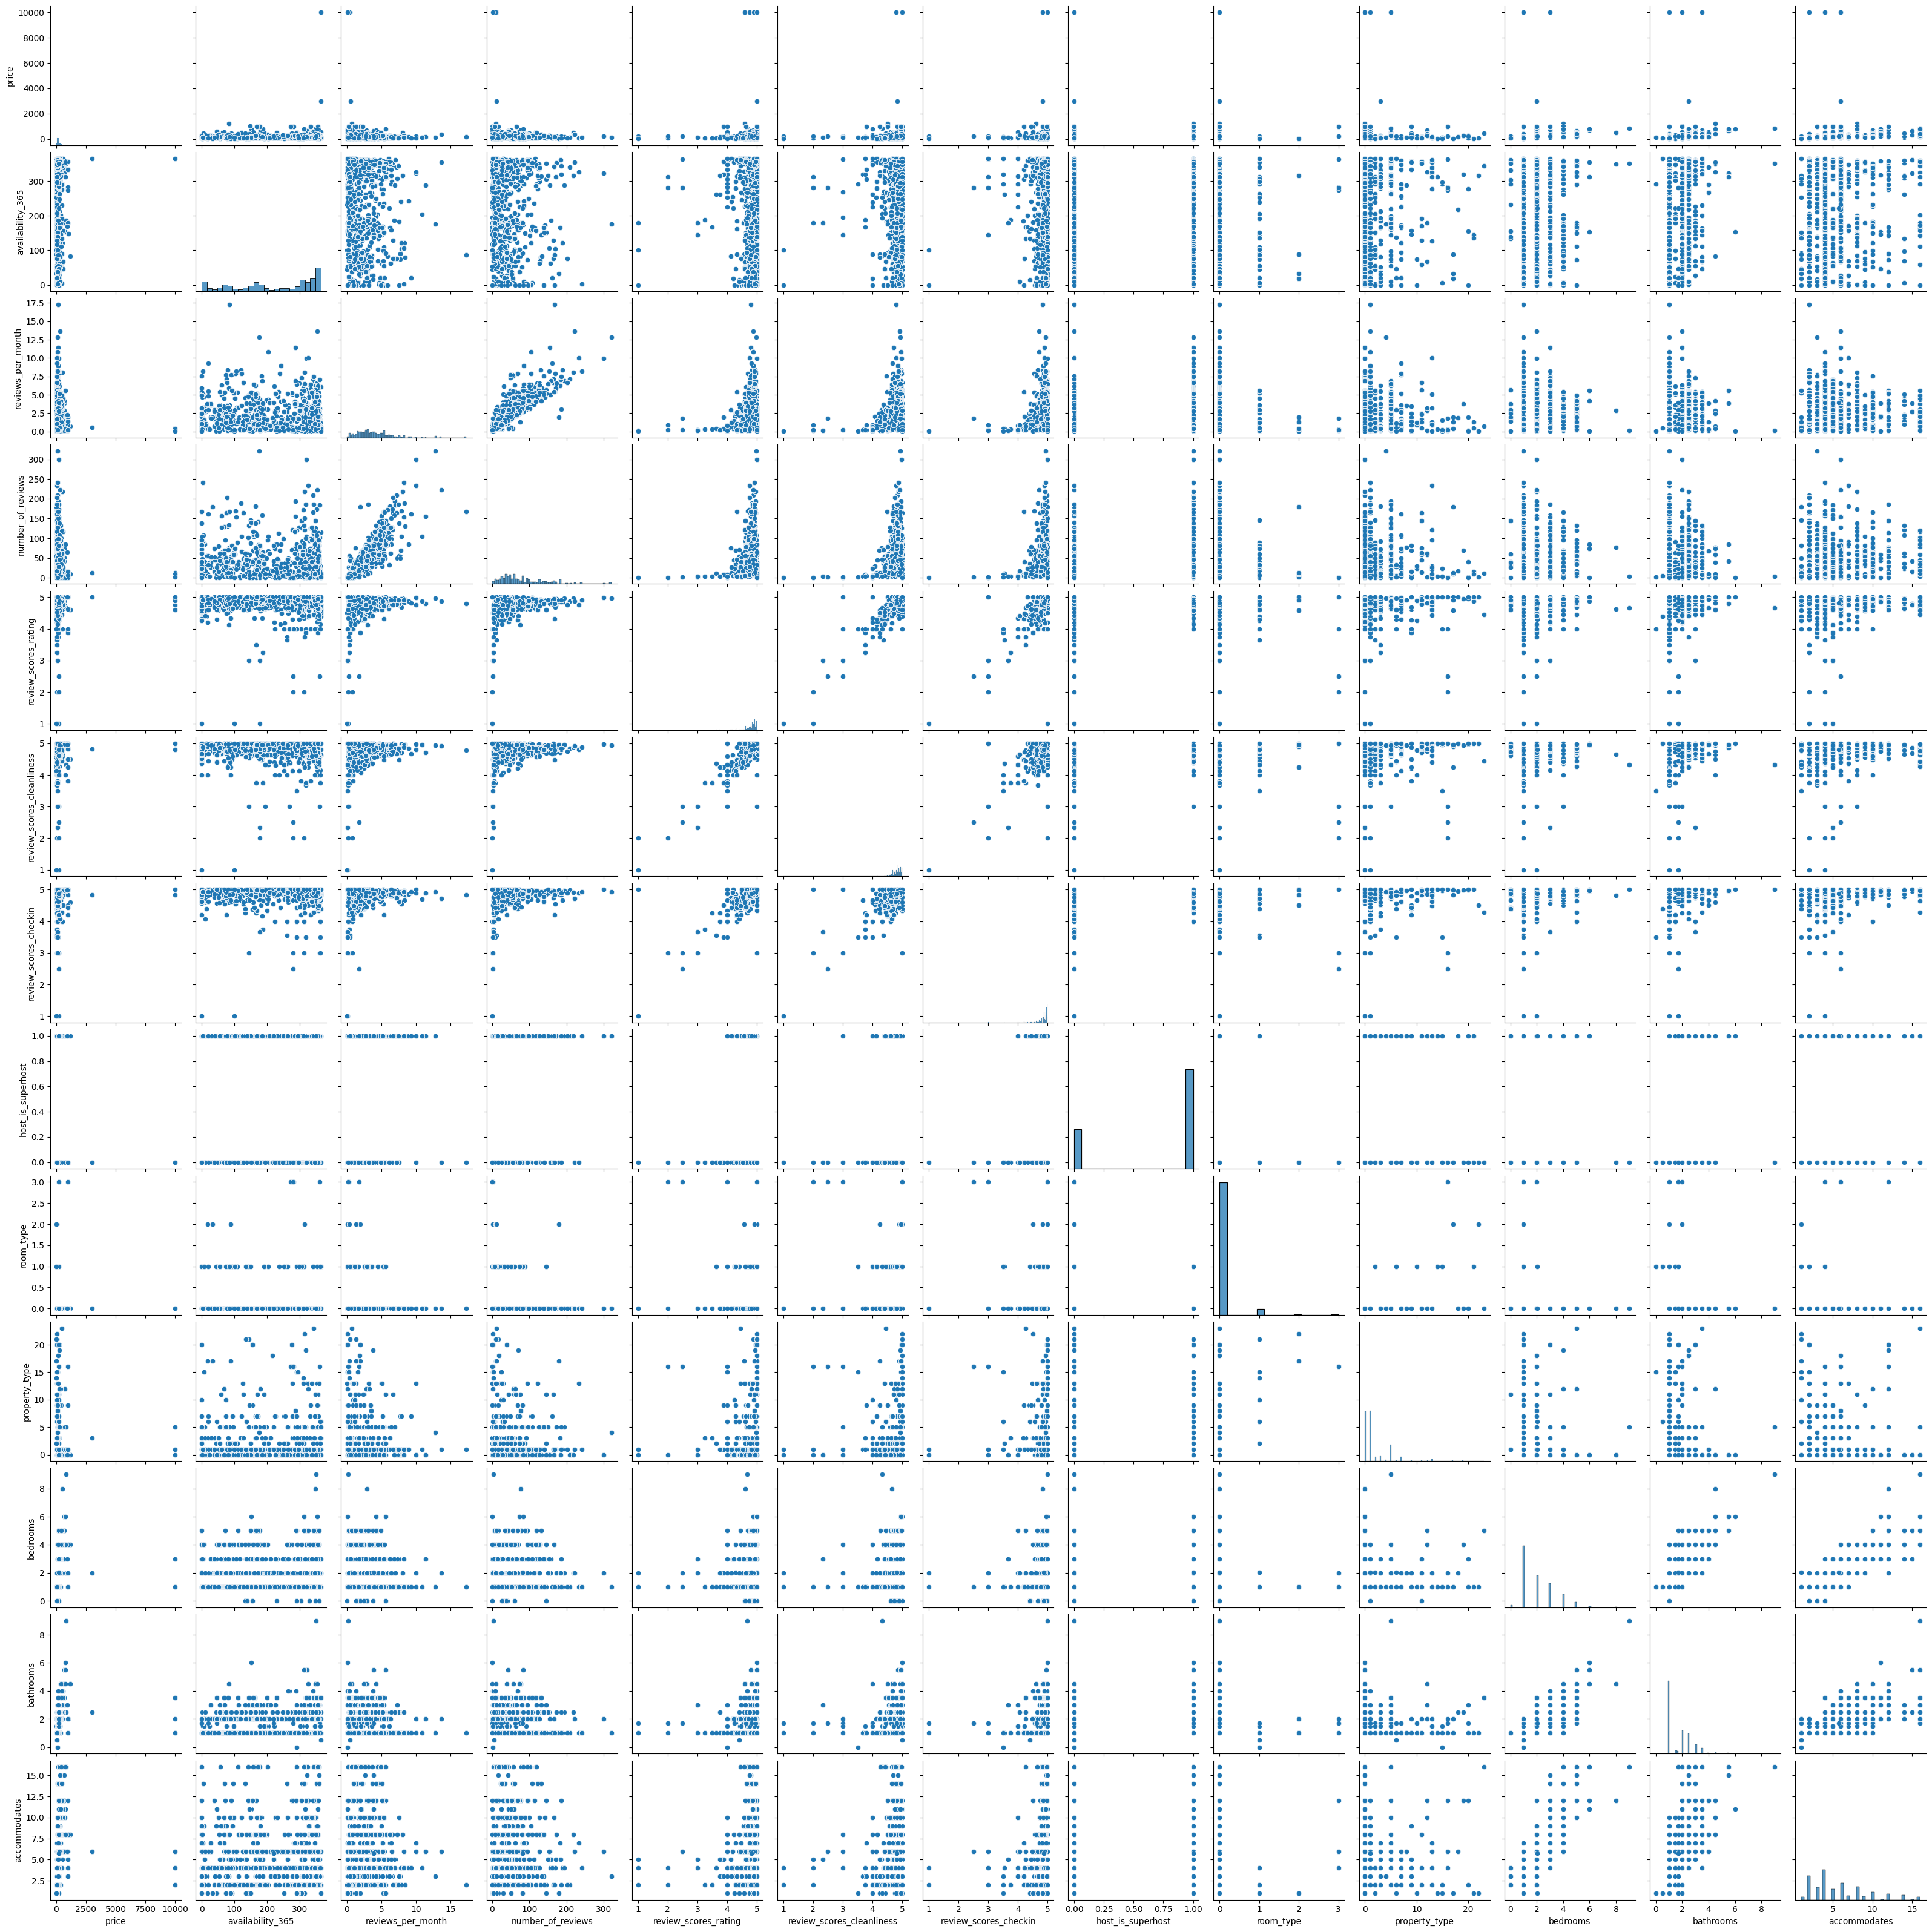

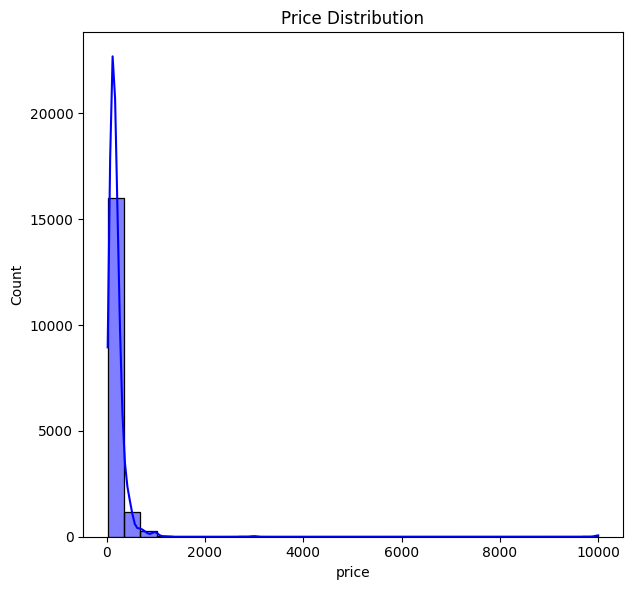

In [30]:
# Pairplot to observe relationships between selected numerical features
sns.pairplot(data_cleaned)
plt.show()

# Plot the distribution of prices before and after COVID
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution')

plt.tight_layout()
plt.show()

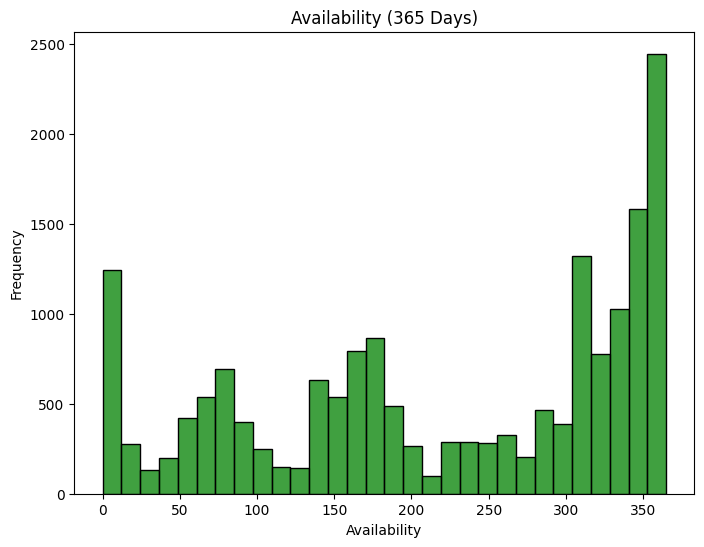

In [31]:
# Checking the availability distribution
if 'availability_365' in data_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_cleaned['availability_365'], kde=False, bins=30, color='green')
    plt.title("Availability (365 Days)")
    plt.xlabel('Availability')
    plt.ylabel('Frequency')
    plt.show()

In [32]:
data_cleaned.columns

Index(['price', 'availability_365', 'reviews_per_month', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'host_is_superhost', 'room_type',
       'property_type', 'bedrooms', 'bathrooms', 'accommodates'],
      dtype='object')

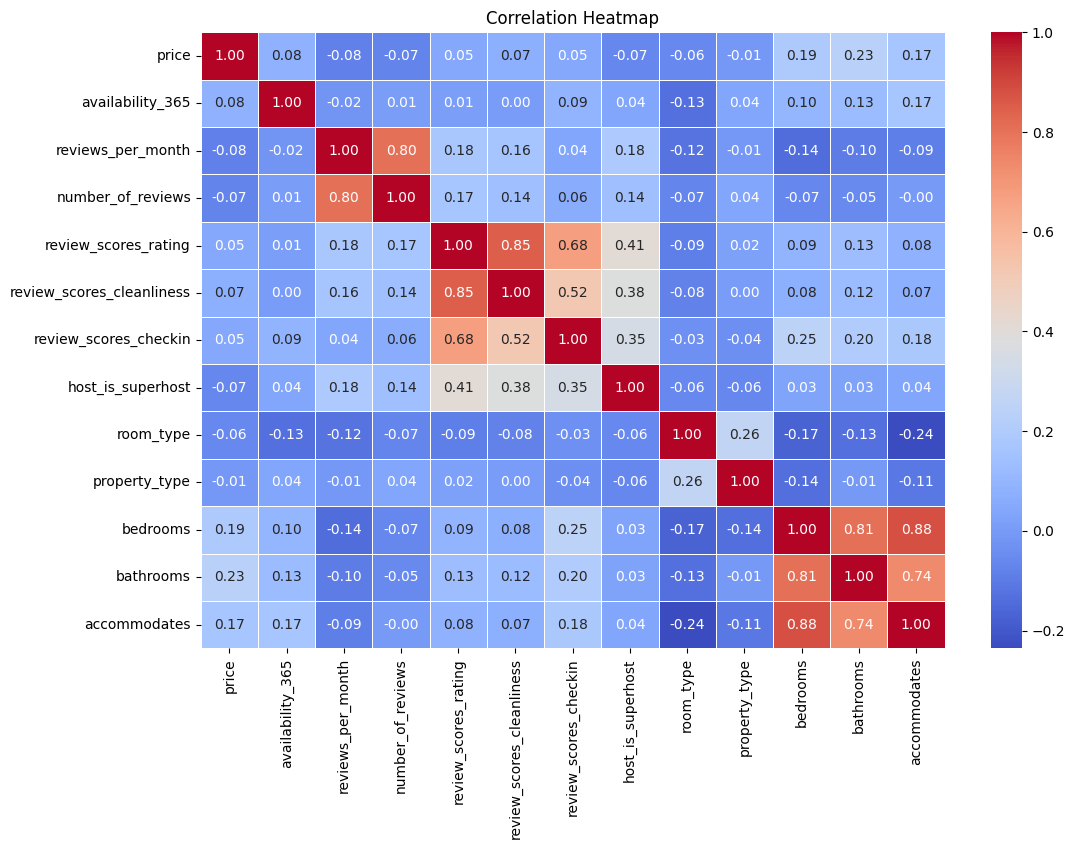

In [33]:
# Filter features based on correlation with 'price' (threshold set to absolute value > 0.2)
correlation_matrix = data_cleaned.corr()
correlation_with_price = correlation_matrix['price'].abs()
relevant_features = correlation_with_price.index.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned[relevant_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# choosing features with greater correlation

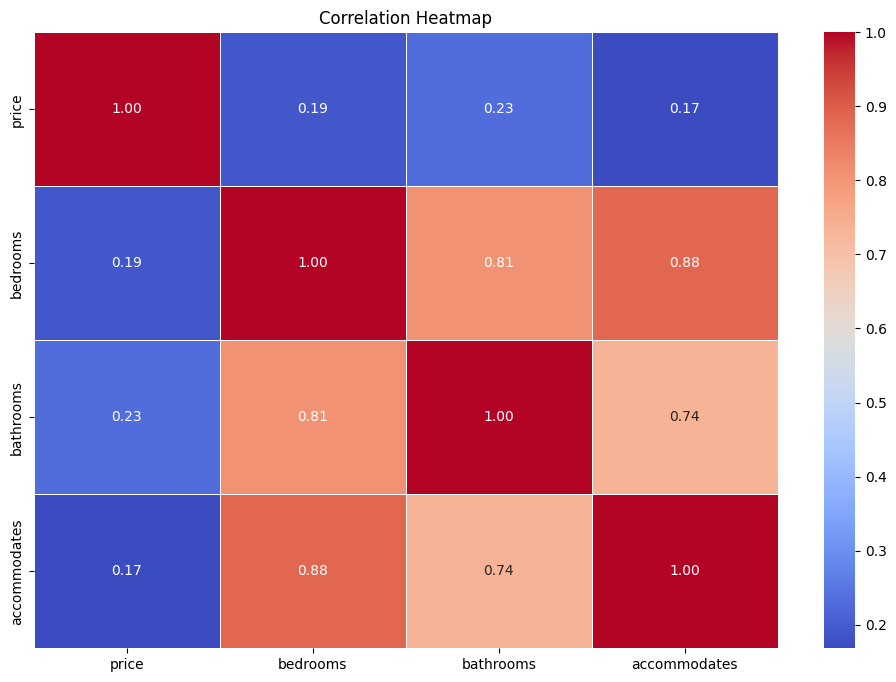

In [34]:
# Filter features based on correlation with 'price' (threshold set to absolute value > 0.2)
correlation_matrix = data_cleaned.corr()
correlation_with_price = correlation_matrix['price'].abs()
relevant_features = correlation_with_price[correlation_with_price >= 0.1].index.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned[relevant_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
relevant_features

['price', 'bedrooms', 'bathrooms', 'accommodates']

In [36]:
data_reduced = data_cleaned[relevant_features]

In [37]:
data_reduced.tail(10)

price  bedrooms  bathrooms  accommodates
17509  235.000000  3.000000   2.500000      8.000000
17510  235.000000  3.000000   2.500000      8.000000
17511  235.000000  3.000000   2.500000      8.000000
17512  235.000000  3.000000   2.500000      8.000000
17513  235.000000  3.000000   2.500000      8.000000
17514  235.000000  3.000000   2.500000      8.000000
17515  235.000000  3.000000   2.500000      8.000000
17516  235.000000  3.000000   2.500000      8.000000
17517  235.000000  3.000000   2.500000      8.000000
17518  202.481398  2.035567   1.703614      5.716577

In [38]:
data_reduced.shape

(17519, 4)

In [39]:
# Split the data into "before" COVID (2016-2020) and "after" COVID (2020-2024)
data_before_covid = data_reduced[(dallas_data['date'] >= '2016-01-01') & (dallas_data['date'] <= '2020-01-01')]
data_after_covid = data_reduced[dallas_data['date'] > '2020-01-01']
print(data_reduced)

            price  bedrooms  bathrooms  accommodates
0      198.000000  3.000000   3.000000     10.000000
1      198.000000  3.000000   3.000000     10.000000
2      198.000000  3.000000   3.000000     10.000000
3      198.000000  3.000000   3.000000     10.000000
4      198.000000  3.000000   3.000000     10.000000
...           ...       ...        ...           ...
17514  235.000000  3.000000   2.500000      8.000000
17515  235.000000  3.000000   2.500000      8.000000
17516  235.000000  3.000000   2.500000      8.000000
17517  235.000000  3.000000   2.500000      8.000000
17518  202.481398  2.035567   1.703614      5.716577

[17519 rows x 4 columns]


In [40]:
data_before_covid.head()

price  bedrooms  bathrooms  accommodates
3280   59.0       1.0        1.0           2.0
3281   59.0       1.0        1.0           2.0
3282   59.0       1.0        1.0           2.0
3283   59.0       1.0        1.0           2.0
3284   59.0       1.0        1.0           2.0

# **Modelling**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
scaler1 = StandardScaler()

# Separate features and target variable for both datasets
X_before = data_before_covid.drop('price', axis=1)
X_before= scaler1.fit_transform(X_before)
y_before = data_before_covid['price']

X_after = data_after_covid.drop('price', axis=1)
scaler2 = StandardScaler()

X_after= scaler2.fit_transform(X_after)
y_after = data_after_covid['price']

# Split the "before COVID" data into training and testing sets
X_before_train, X_before_test, y_before_train, y_before_test = train_test_split(
    X_before, y_before, test_size=0.2, random_state=42)

# Split the "after COVID" data into training and testing sets
X_after_train, X_after_test, y_after_train, y_after_test = train_test_split(
    X_after, y_after, test_size=0.2, random_state=42)




# Linear regression


*********************************************************************
********************** Linear Regression Model **********************
*********************************************************************

*********************************************************************
********************** BEFORE COVID RESULTS (2016-2020) **********************
*********************************************************************
MSE for "Before COVID" (2016-2020) Test Data with Linear Regression: 330.3365753572101
MAE for "Before COVID" (2016-2020) Test Data with Linear Regression: 13.548247118551053
RMSE for "Before COVID" (2016-2020) Test Data with Linear Regression: 18.175163695472186
Adjusted R² for "Before COVID" (2016-2020) Test Data with Linear Regression: 0.9396458959804944

*********************************************************************
********************** AFTER COVID RESULTS (2020-2024) **********************
************************************************************

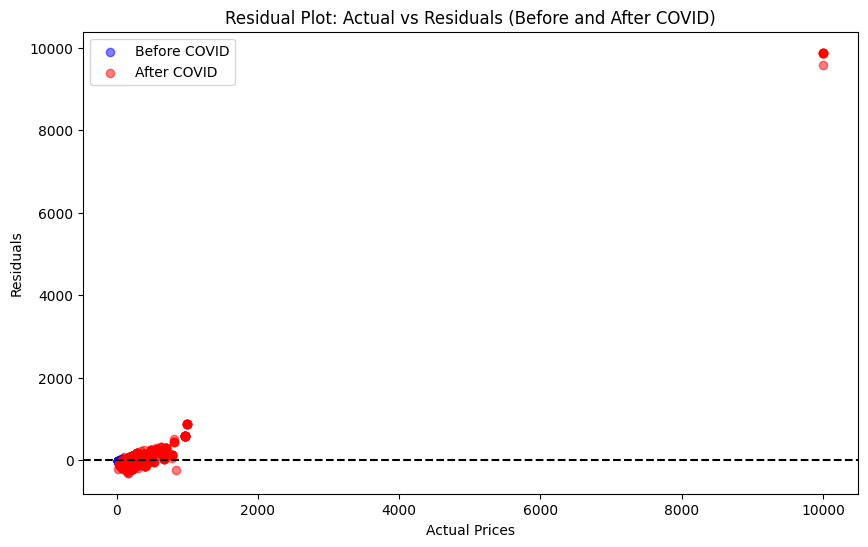

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print("\n*********************************************************************")
print("********************** Linear Regression Model **********************")
print("*********************************************************************")

# from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit the model on the "before COVID" training data
linear_model.fit(X_before_train, y_before_train)

# Predict on the "before COVID" test data
y_pred_before_test = linear_model.predict(X_before_test)

# Calculate R² for "before COVID" test data
r2_before_test = r2_score(y_before_test, y_pred_before_test)


# Fit the model on the "after COVID" training data
linear_model.fit(X_after_train, y_after_train)

# Predict on the "after COVID" test data
y_pred_after_test = linear_model.predict(X_after_test)

# Calculate R² for "after COVID" test data
r2_after_test = r2_score(y_after_test, y_pred_after_test)

# Calculate MSE, MAE, RMSE for "before COVID" test data
mse_before_test = mean_squared_error(y_before_test, y_pred_before_test)
mae_before_test = mean_absolute_error(y_before_test, y_pred_before_test)
rmse_before_test = np.sqrt(mse_before_test)
adjusted_r2_before_test = 1 - (1 - r2_before_test) * (len(y_before_test) - 1) / (len(y_before_test) - X_before_test.shape[1] - 1)

print("\n*********************************************************************")
print("********************** BEFORE COVID RESULTS (2016-2020) **********************")
print("*********************************************************************")

# Print additional metrics for "before COVID" test data
print(f'MSE for "Before COVID" (2016-2020) Test Data with Linear Regression: {mse_before_test}')
print(f'MAE for "Before COVID" (2016-2020) Test Data with Linear Regression: {mae_before_test}')
print(f'RMSE for "Before COVID" (2016-2020) Test Data with Linear Regression: {rmse_before_test}')
print(f'Adjusted R² for "Before COVID" (2016-2020) Test Data with Linear Regression: {adjusted_r2_before_test}')

# Calculate MSE, MAE, RMSE for "after COVID" test data
mse_after_test = mean_squared_error(y_after_test, y_pred_after_test)
mae_after_test = mean_absolute_error(y_after_test, y_pred_after_test)
rmse_after_test = np.sqrt(mse_after_test)
adjusted_r2_after_test = 1 - (1 - r2_after_test) * (len(y_after_test) - 1) / (len(y_after_test) - X_after_test.shape[1] - 1)

print("\n*********************************************************************")
print("********************** AFTER COVID RESULTS (2020-2024) **********************")
print("*********************************************************************")


# Print additional metrics for "after COVID" test data
print(f'MSE for "After COVID" (2020-2024) Test Data with Linear Regression: {mse_after_test}')
print(f'MAE for "After COVID" (2020-2024) Test Data with Linear Regression: {mae_after_test}')
print(f'RMSE for "After COVID" (2020-2024) Test Data with Linear Regression: {rmse_after_test}')
print(f'Adjusted R² for "After COVID" (2020-2024) Test Data with Linear Regression: {adjusted_r2_after_test}')


# Calculate residuals
residuals_before = y_before_test - y_pred_before_test
residuals_after = y_after_test - y_pred_after_test

# Plot residuals
plt.figure(figsize=(10, 6))

# Scatter plot for "Before COVID" residuals
plt.scatter(y_before_test, residuals_before, color='blue', label='Before COVID', alpha=0.5)

# Scatter plot for "After COVID" residuals
plt.scatter(y_after_test, residuals_after, color='red', label='After COVID', alpha=0.5)

# Add horizontal line at y=0 (ideal scenario for residuals)
plt.axhline(y=0, color='black', linestyle='--')

# Labels and title
plt.title('Residual Plot: Actual vs Residuals (Before and After COVID)')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Random Forest


*********************************************************************
********************** Random Forest Model **********************
*********************************************************************

*********************************************************************
********************** BEFORE COVID RESULTS (2016-2020) **********************
*********************************************************************
MSE for "Before COVID" (2016-2020) Test Data: 343.115081342342
MAE for "Before COVID" (2016-2020) Test Data: 13.765025001844203
RMSE for "Before COVID" (2016-2020) Test Data: 18.52336582110125
R² for "Before COVID" (2016-2020) Test Data: 0.9433778585983974

*********************************************************************
********************** AFTER COVID RESULTS (2020-2024) **********************
*********************************************************************
MSE for "After COVID" (2020-2024) Test Data: 201042.25653152502
MAE for "After COVID" (2020-2024)

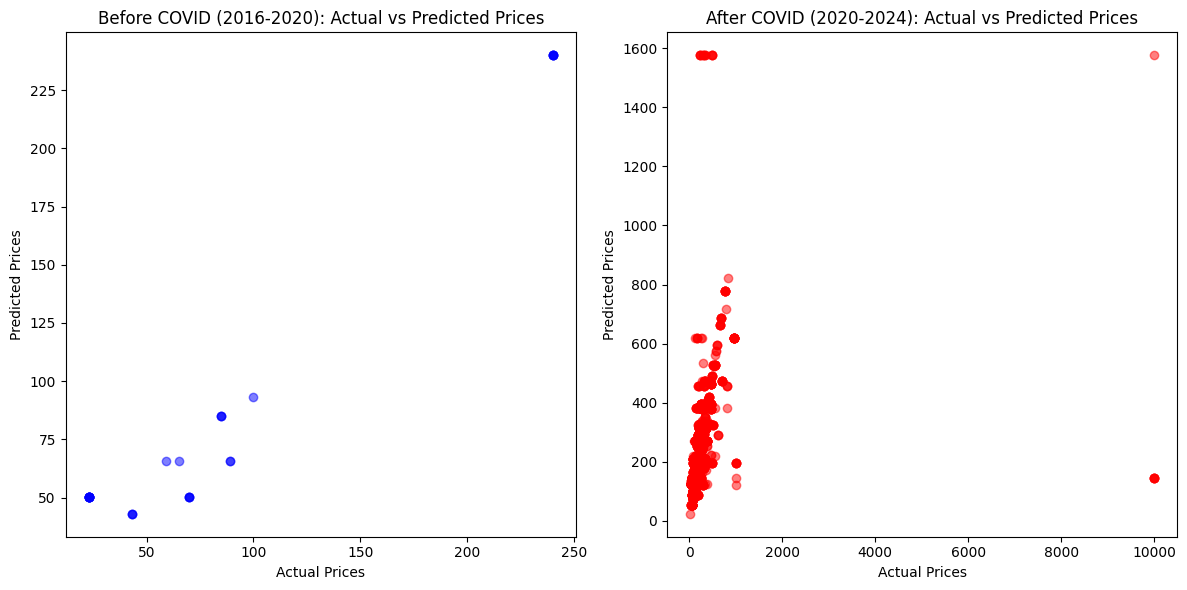

In [43]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

print("\n*********************************************************************")
print("********************** Random Forest Model **********************")
print("*********************************************************************")

# Initialize the Random Forest model
rdf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Before COVID Results Section
print("\n*********************************************************************")
print("********************** BEFORE COVID RESULTS (2016-2020) **********************")
print("*********************************************************************")

# Fit the model on the "before COVID" training data
rdf_model.fit(X_before_train, y_before_train)

# Predict on the "before COVID" test data
y_pred_before_test = rdf_model.predict(X_before_test)

# Calculate MSE, MAE, RMSE, and R² for "before COVID" test data
mse_before_test = mean_squared_error(y_before_test, y_pred_before_test)
mae_before_test = mean_absolute_error(y_before_test, y_pred_before_test)
rmse_before_test = np.sqrt(mse_before_test)  # RMSE is the square root of MSE
r2_before_test = r2_score(y_before_test, y_pred_before_test)

# Print MSE, MAE, RMSE, and R² for "before COVID" test data
print(f'MSE for "Before COVID" (2016-2020) Test Data: {mse_before_test}')
print(f'MAE for "Before COVID" (2016-2020) Test Data: {mae_before_test}')
print(f'RMSE for "Before COVID" (2016-2020) Test Data: {rmse_before_test}')
print(f'R² for "Before COVID" (2016-2020) Test Data: {r2_before_test}')


# After COVID Results Section
print("\n*********************************************************************")
print("********************** AFTER COVID RESULTS (2020-2024) **********************")
print("*********************************************************************")

# Fit the model on the "after COVID" training data
rdf_model.fit(X_after_train, y_after_train)

# Predict on the "after COVID" test data
y_pred_after_test = rdf_model.predict(X_after_test)

# Calculate MSE, MAE, RMSE, and R² for "after COVID" test data
mse_after_test = mean_squared_error(y_after_test, y_pred_after_test)
mae_after_test = mean_absolute_error(y_after_test, y_pred_after_test)
rmse_after_test = np.sqrt(mse_after_test)  # RMSE is the square root of MSE
r2_after_test = r2_score(y_after_test, y_pred_after_test)

# Print MSE, MAE, RMSE, and R² for "after COVID" test data
print(f'MSE for "After COVID" (2020-2024) Test Data: {mse_after_test}')
print(f'MAE for "After COVID" (2020-2024) Test Data: {mae_after_test}')
print(f'RMSE for "After COVID" (2020-2024) Test Data: {rmse_after_test}')
print(f'R² for "After COVID" (2020-2024) Test Data: {r2_after_test}')


# Plot: Comparison of actual vs predicted prices for both "Before COVID" and "After COVID"
plt.figure(figsize=(12, 6))

# Plotting Before COVID predictions
plt.subplot(1, 2, 1)
plt.scatter(y_before_test, y_pred_before_test, color='blue', alpha=0.5)
plt.title("Before COVID (2016-2020): Actual vs Predicted Prices")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Plotting After COVID predictions
plt.subplot(1, 2, 2)
plt.scatter(y_after_test, y_pred_after_test, color='red', alpha=0.5)
plt.title("After COVID (2020-2024): Actual vs Predicted Prices")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

# **Sentiment Analysis**

In [47]:
df = dallas_data
df['hotel'] = 'dallas hotel'
df = df[df['comments'].notna() & (df['comments'] != '')]
# Normalize date formats by replacing hyphens with slashes
df['date'] = df['date'].astype(str).str.replace('/', '-', regex=False)

# Now convert the 'date' column to datetime, forcing a consistent format
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=False)

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['date'])

# Filter dates between 2022 and 2024
start_date = "2023-06-01"
end_date = "2024-12-31"
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Convert dates to MM/DD/YYYY format (USA style)
df['date'] = df['date'].dt.strftime('%m/%d/%Y')

df['comments']

10       Great location and price!!!! The house is so c...
11                             Great stay!  Thanks so much
12       Alisha’s place was very nice and comfortable. ...
13       Alisha and Oscar’s location was a great stay! ...
14                    Wonderful stay! Thanks for having us
                               ...                        
17514    Everything was great! The home was beautiful a...
17515                                 Great place to stay!
17516                               Great stay! Very clean
17517    Our stay was very nice- close to lots of nice ...
17518    Great house with no issues. Will book again fo...
Name: comments, Length: 10367, dtype: object

Using device: cpu
Loading RoBERTa model...
Loading VADER analyzer...
Reading data...

Analyzing reviews...


Processing reviews: 100%|██████████| 324/324 [25:31<00:00,  4.73s/it]



Generating comparison statistics...

Calculating word sentiments...


Processing words: 100%|██████████| 246/246 [00:48<00:00,  5.07it/s]



Generating word clouds...


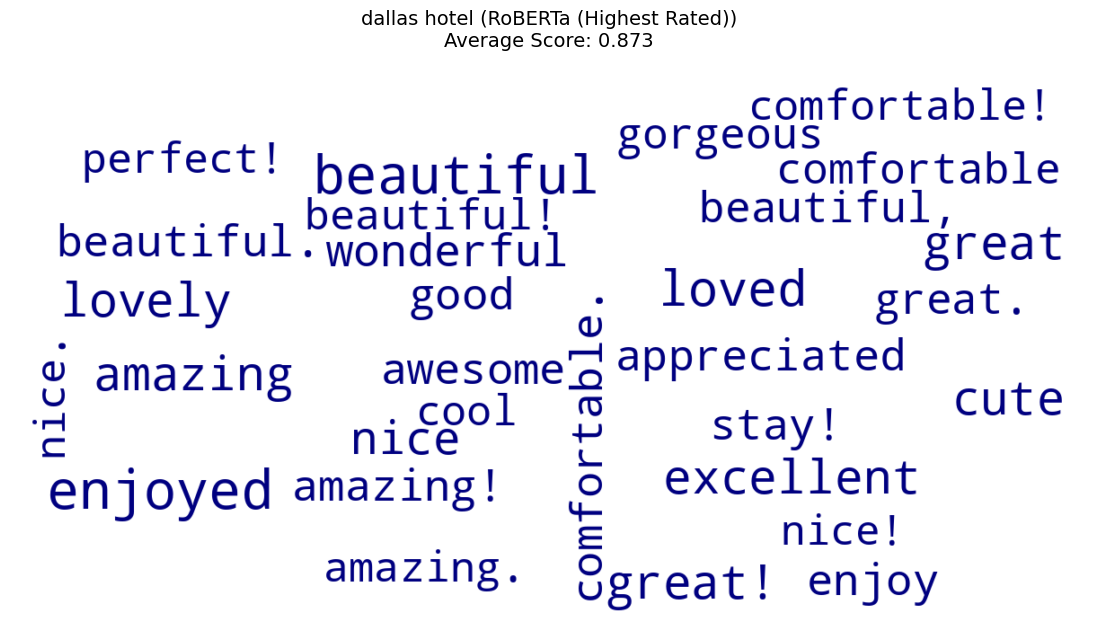

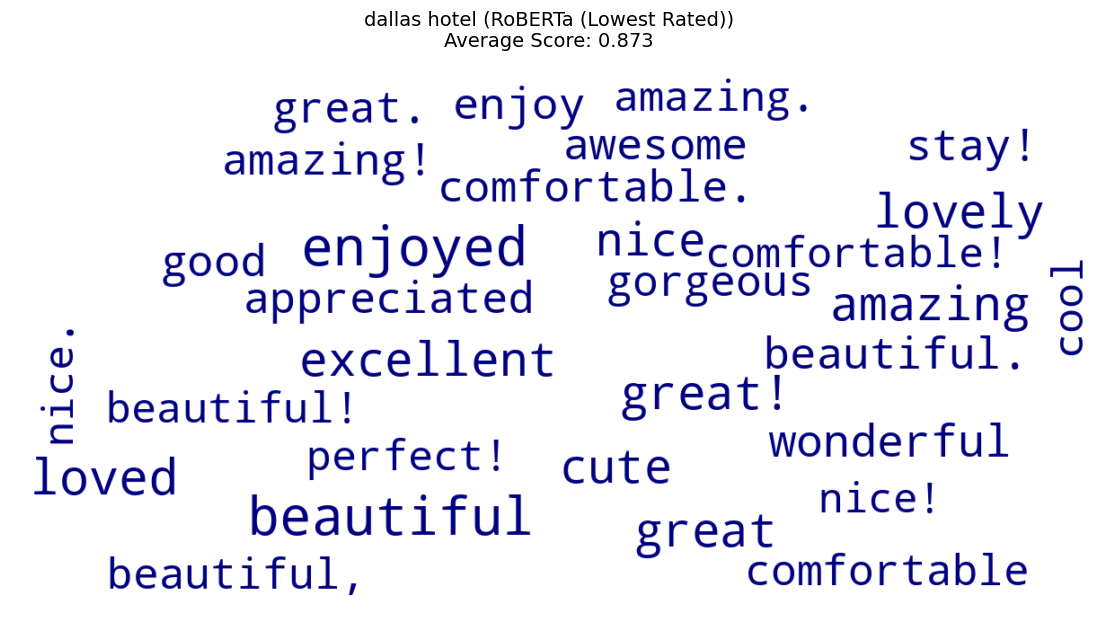

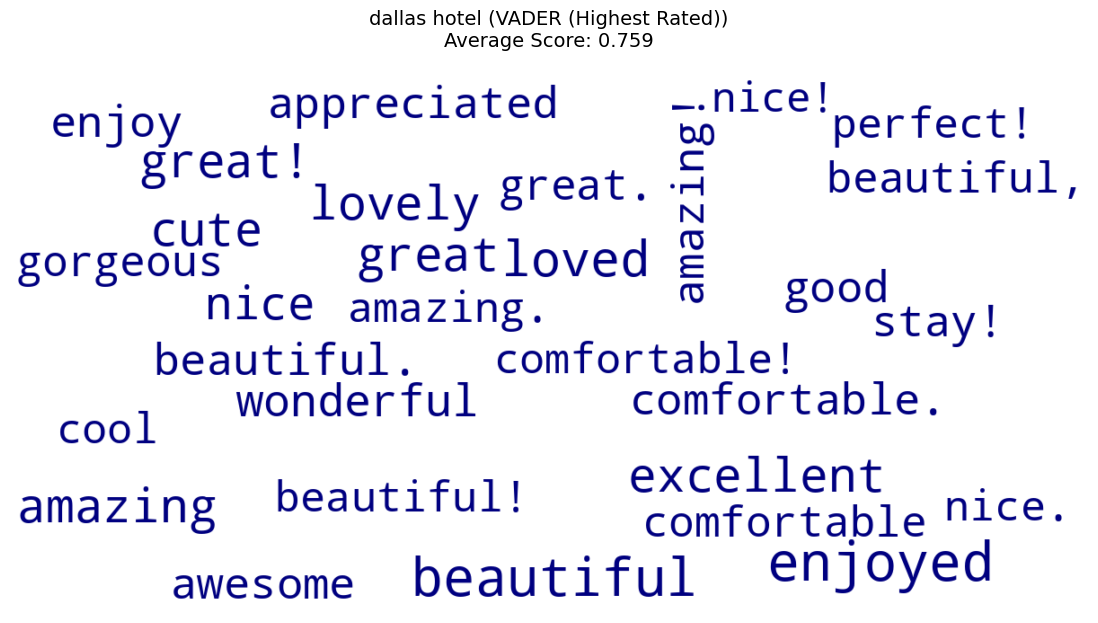

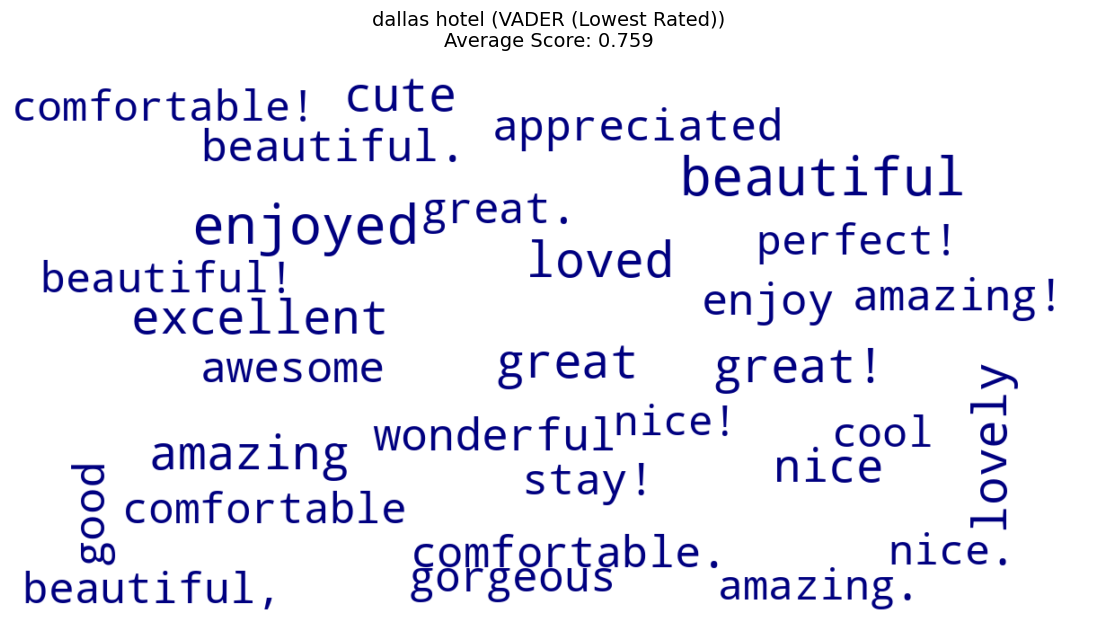


=== Sentiment Analysis Comparison Results ===

Correlation between RoBERTa and VADER scores: 0.705

Hotels with Largest Scoring Differences:
              RoBERTa_Mean  VADER_Mean  Score_Difference
hotel                                                   
dallas hotel         0.873       0.759             0.114

Saving results to Excel...


In [48]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalyzer:
    def __init__(self, batch_size=32):
        self.batch_size = batch_size
        self.device = self.get_device()
        print(f"Using device: {self.device}")

        print("Loading RoBERTa model...")
        model_name = "cardiffnlp/twitter-roberta-base-sentiment"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.model = self.model.to(self.device)
        self.model.eval()  # Set to evaluation mode

        print("Loading VADER analyzer...")
        self.vader = SentimentIntensityAnalyzer()

    def get_device(self):
        if torch.backends.mps.is_available():
            return torch.device("mps")
        elif torch.cuda.is_available():
            return torch.device("cuda")
        return torch.device("cpu")

    def process_batch(self, texts):
        """Process a batch of texts with RoBERTa"""
        # Ensure all texts are strings
        texts = [str(text) if text is not None else "" for text in texts]  # Convert all to string # This line had an extra indent, causing the error.

        inputs = self.tokenizer(
            texts,
            return_tensors='pt',
            truncation=True,
            max_length=512,
            padding=True
        )
        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.model(**inputs)
            scores = torch.nn.functional.softmax(outputs.logits, dim=-1)
            # Convert to scores between -1 and 1
            return (scores[:, 2] - scores[:, 0]).cpu().numpy()

    def analyze_texts(self, texts):
        """Analyze a list of texts in batches"""
        roberta_scores = []
        vader_scores = []

        # Clean the texts: Replace NaN or float with empty string
        texts = [str(text) if isinstance(text, str) else "" for text in texts]  # Convert NaN, None, or float to empty string

        # Process in batches
        for i in tqdm(range(0, len(texts), self.batch_size), desc="Processing reviews"):
            batch_texts = texts[i:i + self.batch_size]

            # RoBERTa sentiment
            roberta_batch_scores = self.process_batch(batch_texts)
            roberta_scores.extend(roberta_batch_scores)

            # VADER sentiment
            vader_batch_scores = [self.vader.polarity_scores(text)['compound']
                                for text in batch_texts]
            vader_scores.extend(vader_batch_scores)

        return roberta_scores, vader_scores

    def create_wordcloud(self, hotel_reviews, sentiment_scores, title):
        """Create word cloud using pre-calculated sentiment scores"""
        # Combine all reviews for the hotel
        all_text = ' '.join(hotel_reviews)
        words_list = [word.lower()
                     for word in all_text.split()
                     if len(word) > 2]

        # Count word frequencies
        word_freq = Counter(words_list)
        total_words = len(words_list)

        # Remove extreme outliers
        threshold = total_words * 0.01

        # Calculate normalized word importance scores
        word_scores = {}
        for word, freq in word_freq.items():
            if freq >= 2:  # Must appear at least twice
                sentiment = abs(sentiment_scores.get(word, 0))
                if sentiment > 0.05:
                    # Combine frequency and sentiment for importance
                    word_scores[word] = sentiment * np.log1p(freq)

        # Keep top 100 words by importance
        word_scores = dict(sorted(word_scores.items(),
                                key=lambda x: x[1],
                                reverse=True)[:100])

        if not word_scores:
            print(f"Warning: No significant terms found for {title}")
            return

        # Create and display word cloud
        wordcloud = WordCloud(
            width=1200,
            height=600,
            background_color='white',
            max_words=30,  # Increased from 20
            min_font_size=10,
            max_font_size=60,
            color_func=lambda *args, **kwargs: 'navy'
        ).generate_from_frequencies(word_scores)

        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=14, pad=20)
        plt.show()

def main():
    # Initialize analyzer
    analyzer = SentimentAnalyzer(batch_size=32)

    # Read data
    print("Reading data...")
    #df = pd.read_csv('/content/Dallas_Airbnb (1).csv')
    #df['hotel'] = 'MGM Grand Hotel'
    # Calculate sentiments for all reviews at once
    print("\nAnalyzing reviews...")
    roberta_scores, vader_scores = analyzer.analyze_texts(df['comments'].tolist())

    # Add scores to dataframe
    df['roberta_sentiment'] = roberta_scores
    df['vader_sentiment'] = vader_scores

    # Calculate correlation
    correlation = np.corrcoef(roberta_scores, vader_scores)[0, 1]

    # Create comparison table
    print("\nGenerating comparison statistics...")
    hotel_stats = df.groupby('hotel').agg({
        'roberta_sentiment': ['mean', 'std'],
        'vader_sentiment': ['mean', 'std'],
        'comments': 'count'
    }).round(3)

    hotel_stats.columns = ['RoBERTa_Mean', 'RoBERTa_Std', 'VADER_Mean', 'VADER_Std', 'Review_Count']
    hotel_stats['Score_Difference'] = (hotel_stats['RoBERTa_Mean'] - hotel_stats['VADER_Mean']).abs()

    # Sort by each scoring method
    roberta_sorted = hotel_stats.sort_values('RoBERTa_Mean', ascending=False)
    vader_sorted = hotel_stats.sort_values('VADER_Mean', ascending=False)

    # Pre-calculate sentiment scores for words
    print("\nCalculating word sentiments...")
    word_sentiments = {}

    # Collect words that appear more than once
    word_freq = Counter(word.lower()
                       for review in df['comments']
                       for word in review.split()
                       if len(word) > 2)

    unique_words = {word for word, freq in word_freq.items() if freq >= 2}

    # Calculate sentiments in batches
    word_batches = [list(unique_words)[i:i + analyzer.batch_size]
                   for i in range(0, len(unique_words), analyzer.batch_size)]

    for batch in tqdm(word_batches, desc="Processing words"):
        roberta_word_scores = analyzer.process_batch(batch)
        for word, score in zip(batch, roberta_word_scores):
            word_sentiments[word] = score

    # Generate word clouds with hotel context
    print("\nGenerating word clouds...")
    for sentiment_type, hotel_name, score_col in [
        ("RoBERTa (Highest Rated)", roberta_sorted.index[0], 'roberta_sentiment'),
        ("RoBERTa (Lowest Rated)", roberta_sorted.index[-1], 'roberta_sentiment'),
        ("VADER (Highest Rated)", vader_sorted.index[0], 'vader_sentiment'),
        ("VADER (Lowest Rated)", vader_sorted.index[-1], 'vader_sentiment')
    ]:
        hotel_reviews = df[df['hotel'] == hotel_name]['comments']
        avg_score = df[df['hotel'] == hotel_name][score_col].mean()
        title = f"{hotel_name} ({sentiment_type})\nAverage Score: {avg_score:.3f}"
        analyzer.create_wordcloud(hotel_reviews, word_sentiments, title)

    # Print results
    print("\n=== Sentiment Analysis Comparison Results ===")
    print(f"\nCorrelation between RoBERTa and VADER scores: {correlation:.3f}")

    print("\nHotels with Largest Scoring Differences:")
    discrepancies = hotel_stats.sort_values('Score_Difference', ascending=False)
    print(discrepancies[['RoBERTa_Mean', 'VADER_Mean', 'Score_Difference']].head())

    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'hotel': hotel_stats.index,
        'RoBERTa_Score': hotel_stats['RoBERTa_Mean'],
        'VADER_Score': hotel_stats['VADER_Mean'],
        'Score_Difference': hotel_stats['Score_Difference'],
        'Review_Count': hotel_stats['Review_Count'],
        'RoBERTa_Rank': hotel_stats.index.get_indexer(roberta_sorted.index) + 1,
        'VADER_Rank': hotel_stats.index.get_indexer(vader_sorted.index) + 1
    })

    # Save results
    print("\nSaving results to Excel...")
    with pd.ExcelWriter('hotel_sentiment_comparison.xlsx') as writer:
        hotel_stats.to_excel(writer, sheet_name='Hotel_Statistics')
        comparison_df.to_excel(writer, sheet_name='Detailed_Comparison', index=False)
        discrepancies.to_excel(writer, sheet_name='Scoring_Discrepancies')

    # Clean up
    if analyzer.device.type in ["mps", "cuda"]:
        torch.cuda.empty_cache()

if __name__ == "__main__":
    main()

Using device: cpu
Loading RoBERTa model...
Loading Hotel-BERT model...


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

Loading VADER analyzer...
Reading data...

Analyzing reviews...


Processing reviews: 100%|██████████| 324/324 [52:34<00:00,  9.74s/it]



Calculating word sentiments...


Processing words: 100%|██████████| 246/246 [01:36<00:00,  2.56it/s]



=== Model Correlations ===
            RoBERTa  Hotel-BERT  VADER
RoBERTa       1.000       0.750  0.705
Hotel-BERT    0.750       1.000  0.543
VADER         0.705       0.543  1.000

=== Hotel Rankings and Extreme Reviews ===

RoBERTa Rankings:
              RoBERTa_Mean  Review_Count
hotel                                   
dallas hotel         0.873         10367

RoBERTa Extreme Reviews:

Highest Rated Hotel: dallas hotel

Top 3 Reviews:
1. [Score: 0.993] The cleanest and coziest place I’ve ever booked! Adorably decorated and the bed was incredibly comfortable. Melida was a great host and I’m so happy I was able to stay here!...
2. [Score: 0.992] Loved this house! It’s located in a cute neighborhood. The hosts did a wonderful job of making us feel welcome and it was perfect for our stay. It was very easy to check in and loved the local recomme...
3. [Score: 0.992] My family and I really enjoyed our stay at Amir’s home! The location was great and the home was really clean! The beds

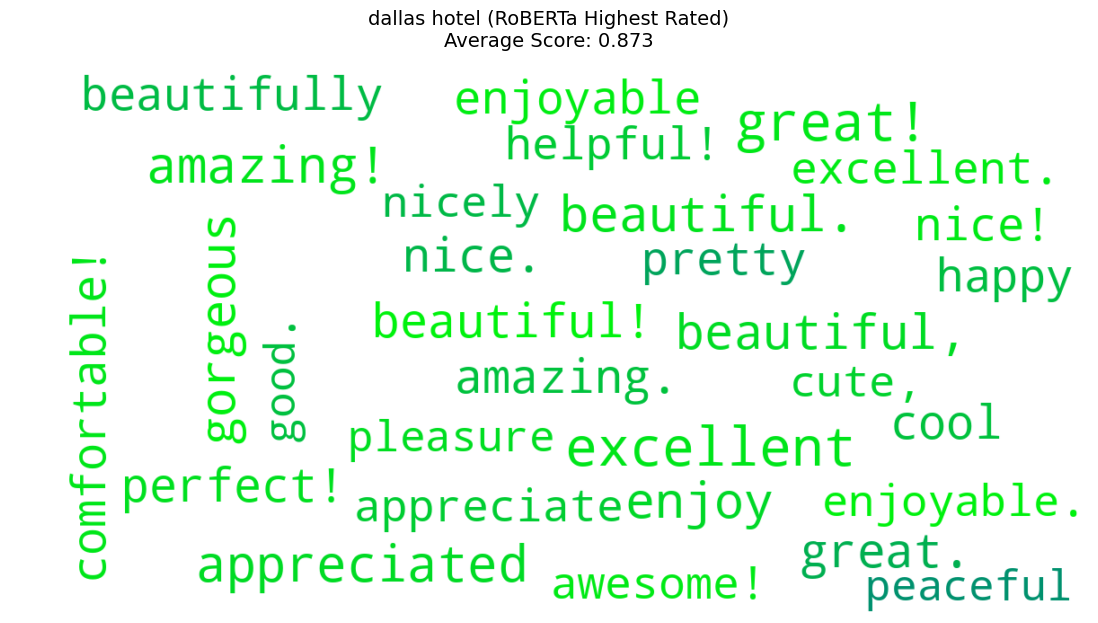

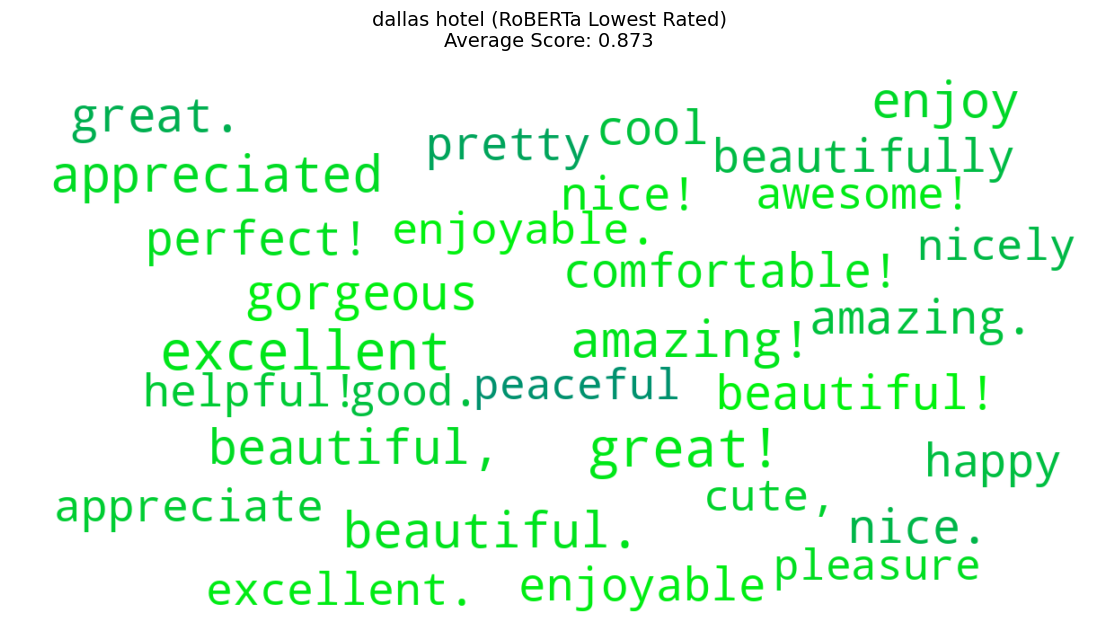


HotelBERT Rankings:
              HotelBERT_Mean  Review_Count
hotel                                     
dallas hotel           0.865         10367

HotelBERT Extreme Reviews:

Highest Rated Hotel: dallas hotel

Top 3 Reviews:
1. [Score: 0.997] Great location, great host, great communication! Five stars all around highly recommended. ⭐️⭐️⭐️⭐️⭐️...
2. [Score: 0.997] Amazing location, amazing host, amazing value, amazing communication! Highly recommended five stars ⭐️⭐️⭐️⭐️⭐️...
3. [Score: 0.996] Awesome place to stay, so clean & crisp! 5 stars for sure!...

Bottom 3 Reviews:
1. [Score: 0.007] The only reason Kayli’s listing is getting a star is because you have no other option but to leave 1 star in order to leave a review. The most disgusting Airbnb we have ever witnessed. Curly course pu...
2. [Score: 0.013] DO NOT BOOK HERE! The first floor room has a pest infestation. We noticed it on the first day, contacted Noemi, and the next day she sent over the “property manager”, even thoug

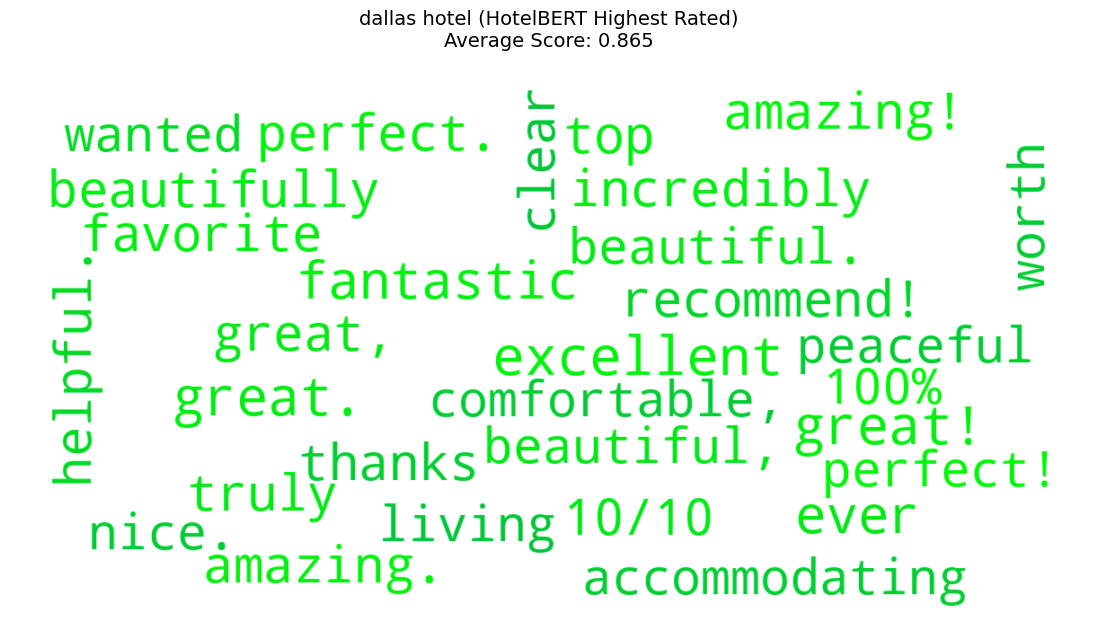

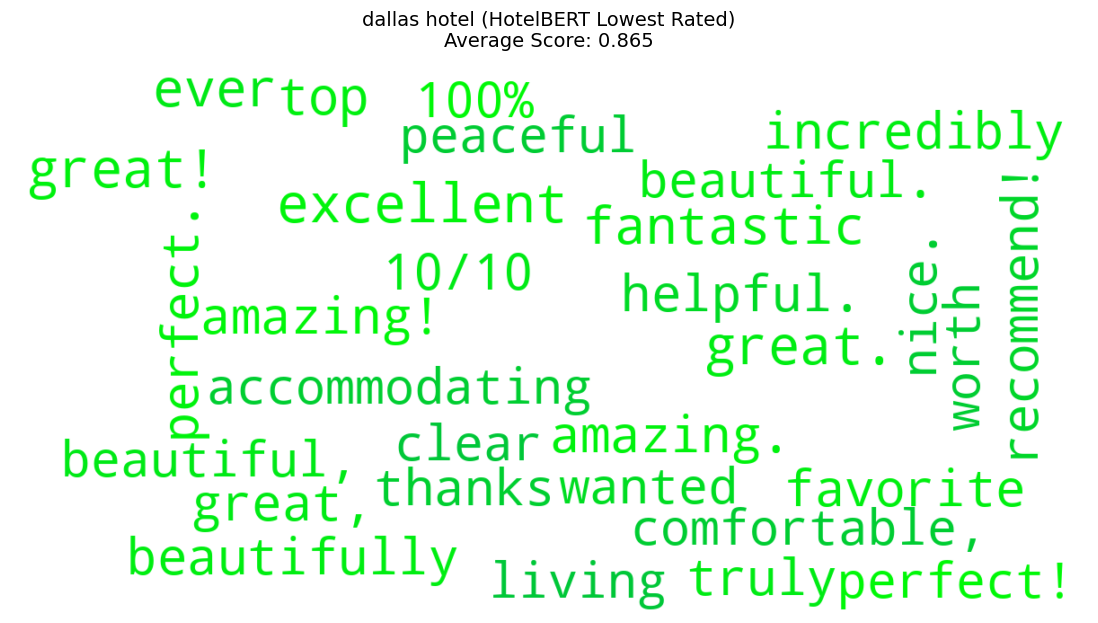


VADER Rankings:
              VADER_Mean  Review_Count
hotel                                 
dallas hotel       0.759         10367

VADER Extreme Reviews:

Highest Rated Hotel: dallas hotel

Top 3 Reviews:
1. [Score: 0.997] We really enjoyed our stay. It was a pleasure communicating with the hosts prior to arriving. And, Wendell took great care to ensure our time there was everything we hoped for & more. And, it was! It’...
2. [Score: 0.997] We had such a lovely stay in the adorable pool house! It was the perfect place for a quick weekend/birthday trip. The neighborhood is super cute and close to the Bishop Arts District, so that was grea...
3. [Score: 0.997] Wow wow wow!! Staying at Josh's place was a phenomenal treat and was definitely one of the best stays I've ever had! He truly thought of EVERYTHING. The Thomas Mansion is stunningly beautiful and incr...

Bottom 3 Reviews:
1. [Score: -0.986] My stay was deeply disappointing, marking one of the worst Airbnb experiences I've had 

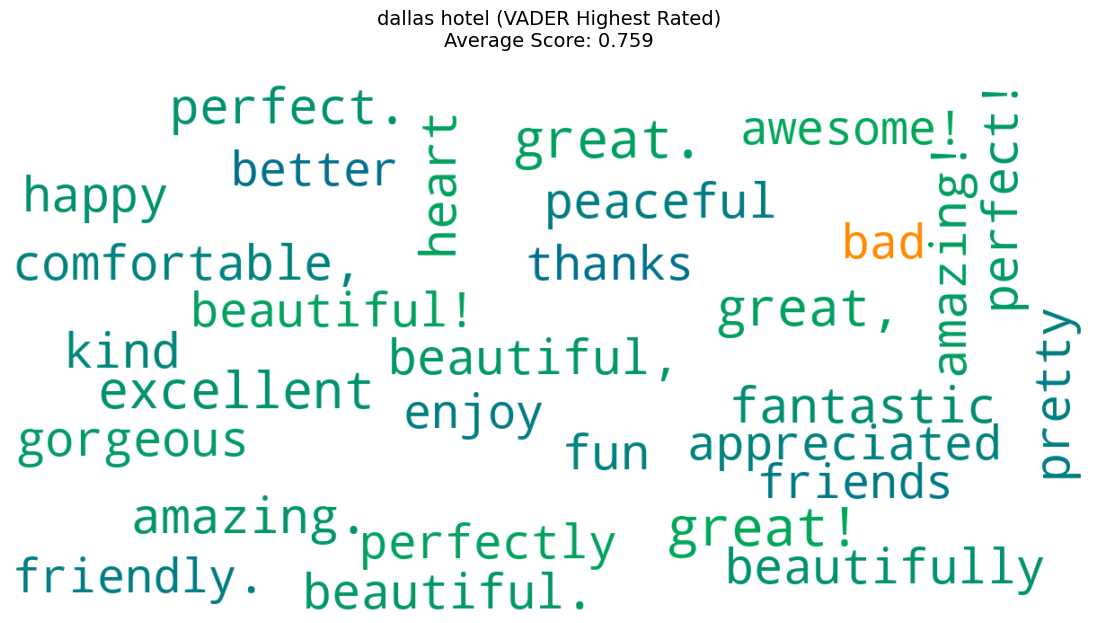

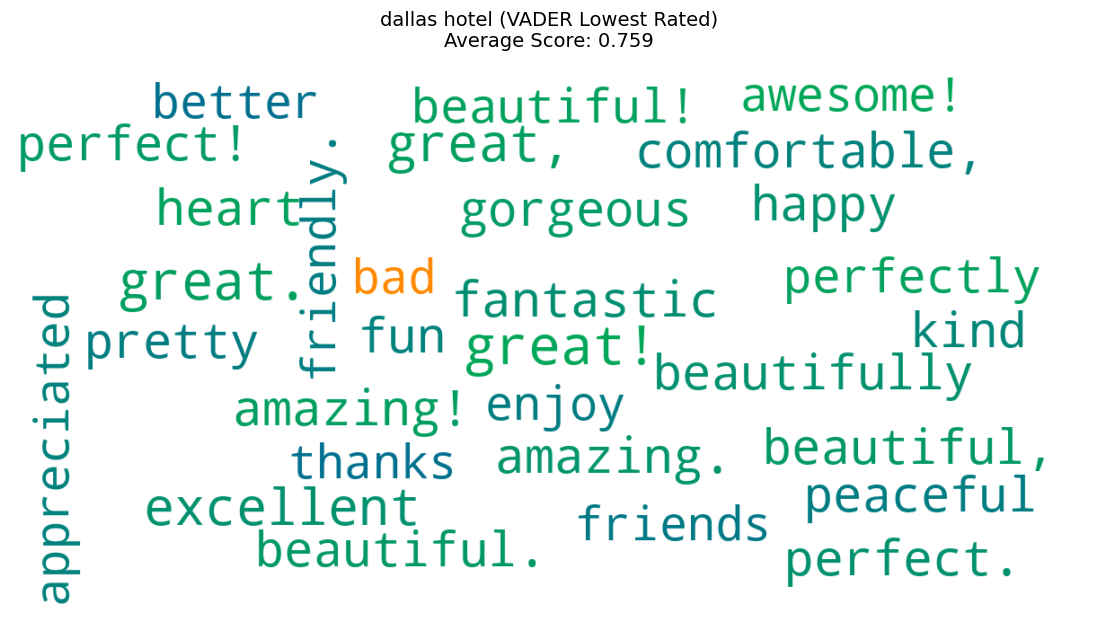


=== Consolidated Hotel Rankings ===

Hotel Rankings by All Models:
              RoBERTa_Score  RoBERTa_Rank  HotelBERT_Score  HotelBERT_Rank  VADER_Score  VADER_Rank  Review_Count  Average_Rank
dallas hotel          0.873           1.0            0.865             1.0        0.759         1.0         10367           1.0

Saving results to Excel...


In [49]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalyzer:
    def __init__(self, batch_size=32):
        self.batch_size = batch_size
        self.device = self.get_device()
        print(f"Using device: {self.device}")

        print("Loading RoBERTa model...")
        roberta_name = "cardiffnlp/twitter-roberta-base-sentiment"
        self.roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_name)
        self.roberta_model = AutoModelForSequenceClassification.from_pretrained(roberta_name)
        self.roberta_model = self.roberta_model.to(self.device)
        self.roberta_model.eval()

        print("Loading Hotel-BERT model...")
        hotel_bert_name = "nlptown/bert-base-multilingual-uncased-sentiment"
        self.hotel_bert_tokenizer = AutoTokenizer.from_pretrained(hotel_bert_name)
        self.hotel_bert_model = AutoModelForSequenceClassification.from_pretrained(hotel_bert_name)
        self.hotel_bert_model = self.hotel_bert_model.to(self.device)
        self.hotel_bert_model.eval()

        print("Loading VADER analyzer...")
        self.vader = SentimentIntensityAnalyzer()

    def get_device(self):
        if torch.backends.mps.is_available():
            return torch.device("mps")
        elif torch.cuda.is_available():
            return torch.device("cuda")
        return torch.device("cpu")

    def process_roberta_batch(self, texts):
        """Process a batch of texts with RoBERTa"""
        if isinstance(texts, str):
            texts = [texts]

        inputs = self.roberta_tokenizer(
            texts,
            return_tensors='pt',
            truncation=True,
            max_length=512,
            padding=True
        )
        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.roberta_model(**inputs)
            scores = torch.nn.functional.softmax(outputs.logits, dim=-1)
            return (scores[:, 2] - scores[:, 0]).cpu().numpy()

    def process_hotel_bert_batch(self, texts):
        """Process a batch of texts with Hotel BERT"""
        if isinstance(texts, str):
            texts = [texts]

        inputs = self.hotel_bert_tokenizer(
            texts,
            return_tensors='pt',
            truncation=True,
            max_length=512,
            padding=True
        )
        inputs = {k: v.to(self.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.hotel_bert_model(**inputs)
            scores = torch.nn.functional.softmax(outputs.logits, dim=-1)

            # Calculate weighted average for 1-5 star ratings and normalize to 0-1
            weights = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32, device=self.device)
            weighted_scores = (scores * weights.unsqueeze(0)).sum(dim=1)
            normalized_scores = (weighted_scores - 1) / 4  # Convert from 1-5 to 0-1 scale

            return normalized_scores.cpu().numpy()

    def analyze_texts(self, texts):
        """Analyze texts using all three models"""
        roberta_scores = []
        hotel_bert_scores = []
        vader_scores = []
        word_sentiments = {}

        # Process reviews in batches
        for i in tqdm(range(0, len(texts), self.batch_size), desc="Processing reviews"):
            batch_texts = texts[i:i + self.batch_size]

            roberta_batch = self.process_roberta_batch(batch_texts)
            hotel_bert_batch = self.process_hotel_bert_batch(batch_texts)
            vader_batch = [self.vader.polarity_scores(text)['compound'] for text in batch_texts]

            roberta_scores.extend(roberta_batch)
            hotel_bert_scores.extend(hotel_bert_batch)
            vader_scores.extend(vader_batch)

        # Get unique words and their sentiments
        print("\nCalculating word sentiments...")
        word_freq = Counter(word.lower()
                          for text in texts
                          for word in text.split()
                          if len(word) > 2)

        # Remove words that appear less than twice
        unique_words = {word for word, freq in word_freq.items() if freq >= 2}

        # Process unique words in batches
        word_list = list(unique_words)
        for i in tqdm(range(0, len(word_list), self.batch_size), desc="Processing words"):
            batch_words = word_list[i:i + self.batch_size]

            roberta_word_scores = self.process_roberta_batch(batch_words)
            hotel_bert_word_scores = self.process_hotel_bert_batch(batch_words)
            vader_word_scores = [self.vader.polarity_scores(word)['compound']
                               for word in batch_words]

            for word, r_score, h_score, v_score in zip(batch_words,
                                                      roberta_word_scores,
                                                      hotel_bert_word_scores,
                                                      vader_word_scores):
                word_sentiments[word] = {
                    'roberta': r_score,
                    'hotel-bert': h_score,
                    'vader': v_score
                }

        return np.array(roberta_scores), np.array(hotel_bert_scores), np.array(vader_scores), word_sentiments

    def create_wordcloud(self, hotel_reviews, word_sentiments, model_type, title):
        """Create word cloud using pre-calculated sentiment scores"""
        words_list = [word.lower()
                     for review in hotel_reviews
                     for word in review.split()
                     if len(word) > 2]

        # Count word frequencies
        word_freq = Counter(words_list)

        # Calculate frequency percentiles for outlier removal
        freq_values = np.array(list(word_freq.values()))
        lower_threshold = np.percentile(freq_values, 1)
        upper_threshold = np.percentile(freq_values, 99)

        # Calculate word importance scores
        word_scores = {}
        for word, freq in word_freq.items():
            if lower_threshold <= freq <= upper_threshold and freq >= 2:
                sentiment = abs(word_sentiments.get(word, {}).get(model_type, 0))
                if sentiment > 0.05:
                    word_scores[word] = sentiment * np.log1p(freq)

        if not word_scores:
            print(f"Warning: No significant terms found for {title}")
            return

        def color_func(word, **kwargs):
            sentiment = word_sentiments.get(word, {}).get(model_type, 0)
            if sentiment > 0:
                intensity = int(min(255, abs(sentiment) * 255))
                return f"rgb(0,{intensity},{255-intensity})"
            else:
                intensity = int(min(255, abs(sentiment) * 255))
                return f"rgb({255},{intensity},0)"

        wordcloud = WordCloud(
            width=1200,
            height=600,
            background_color='white',
            max_words=30,
            min_font_size=10,
            max_font_size=60,
            color_func=color_func
        ).generate_from_frequencies(word_scores)

        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=14, pad=20)
        plt.show()
        plt.close()

def get_extreme_reviews(df, hotel_name, score_col, n=3):
    """Get top and bottom n reviews for a hotel based on score"""
    hotel_reviews = df[df['hotel'] == hotel_name]

    top_reviews = hotel_reviews.nlargest(n, score_col)[['comments', score_col]]
    bottom_reviews = hotel_reviews.nsmallest(n, score_col)[['comments', score_col]]

    return top_reviews, bottom_reviews

def main():
    # Initialize analyzer
    analyzer = SentimentAnalyzer(batch_size=32)

    # Read data
    print("Reading data...")
    # Calculate sentiments for all reviews
    print("\nAnalyzing reviews...")
    roberta_scores, hotel_bert_scores, vader_scores, word_sentiments = analyzer.analyze_texts(df['comments'].tolist())

    # Add scores to dataframe
    df['roberta_sentiment'] = roberta_scores
    df['hotel_bert_sentiment'] = hotel_bert_scores
    df['vader_sentiment'] = vader_scores

    # Calculate correlations
    correlations = pd.DataFrame({
        'RoBERTa': [1,
                    np.corrcoef(roberta_scores, hotel_bert_scores)[0,1],
                    np.corrcoef(roberta_scores, vader_scores)[0,1]],
        'Hotel-BERT': [np.corrcoef(hotel_bert_scores, roberta_scores)[0,1],
                      1,
                      np.corrcoef(hotel_bert_scores, vader_scores)[0,1]],
        'VADER': [np.corrcoef(vader_scores, roberta_scores)[0,1],
                 np.corrcoef(vader_scores, hotel_bert_scores)[0,1],
                 1]
    }, index=['RoBERTa', 'Hotel-BERT', 'VADER'])

    print("\n=== Model Correlations ===")
    print(correlations.round(3))

    # Calculate hotel statistics
    hotel_stats = df.groupby('hotel').agg({
        'roberta_sentiment': ['mean', 'std'],
        'hotel_bert_sentiment': ['mean', 'std'],
        'vader_sentiment': ['mean', 'std'],
        'comments': 'count'
    }).round(3)

    hotel_stats.columns = ['RoBERTa_Mean', 'RoBERTa_Std',
                          'HotelBERT_Mean', 'HotelBERT_Std',
                          'VADER_Mean', 'VADER_Std', 'Review_Count']

    # Sort by each scoring method
    roberta_sorted = hotel_stats.sort_values('RoBERTa_Mean', ascending=False)
    hotel_bert_sorted = hotel_stats.sort_values('HotelBERT_Mean', ascending=False)
    vader_sorted = hotel_stats.sort_values('VADER_Mean', ascending=False)

    # Print rankings and extreme reviews for each model
    print("\n=== Hotel Rankings and Extreme Reviews ===")
    model_configs = [
        ('roberta', roberta_sorted, 'roberta_sentiment', 'RoBERTa', 'RoBERTa_Mean'),
        ('hotel-bert', hotel_bert_sorted, 'hotel_bert_sentiment', 'HotelBERT', 'HotelBERT_Mean'),
        ('vader', vader_sorted, 'vader_sentiment', 'VADER', 'VADER_Mean')
    ]

    for model_type, sorted_stats, score_col, model_name, mean_col in model_configs:
        print(f"\n{model_name} Rankings:")
        print(sorted_stats[[mean_col, 'Review_Count']])

        print(f"\n{model_name} Extreme Reviews:")

        # For highest rated hotel
        top_hotel = sorted_stats.index[0]
        print(f"\nHighest Rated Hotel: {top_hotel}")
        top_reviews, bottom_reviews = get_extreme_reviews(df, top_hotel, score_col)

        print("\nTop 3 Reviews:")
        for idx, (_, row) in enumerate(top_reviews.iterrows(), 1):
            print(f"{idx}. [Score: {row[score_col]:.3f}] {row['comments'][:200]}...")

        print("\nBottom 3 Reviews:")
        for idx, (_, row) in enumerate(bottom_reviews.iterrows(), 1):
            print(f"{idx}. [Score: {row[score_col]:.3f}] {row['comments'][:200]}...")

        # For lowest rated hotel
        bottom_hotel = sorted_stats.index[-1]
        print(f"\nLowest Rated Hotel: {bottom_hotel}")
        top_reviews, bottom_reviews = get_extreme_reviews(df, bottom_hotel, score_col)

        print("\nTop 3 Reviews:")
        for idx, (_, row) in enumerate(top_reviews.iterrows(), 1):
            print(f"{idx}. [Score: {row[score_col]:.3f}] {row['comments'][:200]}...")

        print("\nBottom 3 Reviews:")
        for idx, (_, row) in enumerate(bottom_reviews.iterrows(), 1):
            print(f"{idx}. [Score: {row[score_col]:.3f}] {row['comments'][:200]}...")

        # Generate word clouds
        print(f"\nGenerating word clouds for {model_name}...")
        for hotel_name, rating in [(top_hotel, "Highest"), (bottom_hotel, "Lowest")]:
            hotel_reviews = df[df['hotel'] == hotel_name]['comments']
            avg_score = df[df['hotel'] == hotel_name][score_col].mean()
            title = f"{hotel_name} ({model_name} {rating} Rated)\nAverage Score: {avg_score:.3f}"
            analyzer.create_wordcloud(hotel_reviews, word_sentiments, model_type, title)

    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Hotel': hotel_stats.index,
        'RoBERTa_Score': hotel_stats['RoBERTa_Mean'],
        'HotelBERT_Score': hotel_stats['HotelBERT_Mean'],
        'VADER_Score': hotel_stats['VADER_Mean'],
        'Review_Count': hotel_stats['Review_Count'],
        'RoBERTa_Rank': hotel_stats.index.get_indexer(roberta_sorted.index) + 1,
        'HotelBERT_Rank': hotel_stats.index.get_indexer(hotel_bert_sorted.index) + 1,
        'VADER_Rank': hotel_stats.index.get_indexer(vader_sorted.index) + 1
    })
     # Print consolidated rankings table
    print("\n=== Consolidated Hotel Rankings ===")
    rankings_df = pd.DataFrame(index=df['hotel'].unique())

    for model_name, score_col in [
        ('RoBERTa', 'roberta_sentiment'),
        ('HotelBERT', 'hotel_bert_sentiment'),
        ('VADER', 'vader_sentiment')
    ]:
        # Add mean scores
        rankings_df[f'{model_name}_Score'] = df.groupby('hotel')[score_col].mean()

        # Add ranks
        rankings_df[f'{model_name}_Rank'] = rankings_df[f'{model_name}_Score'].rank(ascending=False, method='min')

    # Add review count
    rankings_df['Review_Count'] = df.groupby('hotel')['comments'].count()

    # Calculate average rank across all models
    rank_columns = [col for col in rankings_df.columns if col.endswith('_Rank')]
    rankings_df['Average_Rank'] = rankings_df[rank_columns].mean(axis=1)

    # Sort by average rank
    rankings_df = rankings_df.sort_values('Average_Rank')

    # Round scores to 3 decimal places
    score_columns = [col for col in rankings_df.columns if col.endswith('_Score')]
    rankings_df[score_columns] = rankings_df[score_columns].round(3)

    print("\nHotel Rankings by All Models:")
    print(rankings_df.to_string())

    # Also save this to the Excel file
    with pd.ExcelWriter('hotel_sentiment_comparison.xlsx') as writer:
        correlations.to_excel(writer, sheet_name='Model_Correlations')
        hotel_stats.to_excel(writer, sheet_name='Hotel_Statistics')
        rankings_df.to_excel(writer, sheet_name='Consolidated_Rankings')
    # Save results
    print("\nSaving results to Excel...")
    with pd.ExcelWriter('hotel_sentiment_comparison.xlsx') as writer:
        correlations.to_excel(writer, sheet_name='Model_Correlations')
        hotel_stats.to_excel(writer, sheet_name='Hotel_Statistics')
        comparison_df.to_excel(writer, sheet_name='Detailed_Comparison', index=False)

        # Save extreme reviews
        extreme_reviews_data = []
        for model_name, score_col in [
            ('RoBERTa', 'roberta_sentiment'),
            ('Hotel-BERT', 'hotel_bert_sentiment'),
            ('VADER', 'vader_sentiment')
        ]:
            sorted_hotels = df.groupby('hotel')[score_col].mean().sort_values(ascending=False)
            for hotel_name in [sorted_hotels.index[0], sorted_hotels.index[-1]]:
                top_reviews, bottom_reviews = get_extreme_reviews(df, hotel_name, score_col)
                extreme_reviews_data.append({
                    'Model': model_name,
                    'Hotel': hotel_name,
                    'Rating': 'Highest' if hotel_name == sorted_hotels.index[0] else 'Lowest',
                    'Average_Score': sorted_hotels[hotel_name],
                    'Top_Reviews': '\n\n'.join(top_reviews['comments']),
                    'Top_Scores': ', '.join(map(str, top_reviews[score_col].round(3))),
                    'Bottom_Reviews': '\n\n'.join(bottom_reviews['comments']),
                    'Bottom_Scores': ', '.join(map(str, bottom_reviews[score_col].round(3)))
                })

        pd.DataFrame(extreme_reviews_data).to_excel(writer, sheet_name='Extreme_Reviews', index=False)

    # Clean up
    if analyzer.device.type in ["mps", "cuda"]:
        torch.cuda.empty_cache()

if __name__ == "__main__":
    main()